In [74]:
using Arpack
using LinearAlgebra
using PyPlot
using LaTeXStrings
using Revise
includet("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
includet("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")
includet("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/lambda_funcs.jl")

# Eigenvector derivative setups

In [75]:
function A1_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A1 = (epsilon - v5) * (epsilon - v3) - abs2(f1)
    
    return A1 / sqrt(nmz)
end
function A3_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A3 = conj(f3) * (epsilon - v3) + f1 * f5
    
    return A3 / sqrt(nmz)
end
function A5_comp(delta, alpha, k, index, vF)
    x, y = k
    epsilon = vF_analytic_eigenvalues(alpha, delta, k[1], k[2], vF)[index]
    # convenience
    v = vF
    omega = exp(im * 2 * pi/ 3)
    q = k[1] + im * k[2]
    # variables
    f1 = delta + alpha * (q + conj(q))
    v1 = v * (q + conj(q))
    f3 = delta + alpha * (omega * q + conj(omega * q))
    v3 = v * (omega * q + conj(omega * q))
    f5 = delta + alpha * (conj(omega) * q + omega * conj(q))
    v5 = v * (conj(omega) * q + omega * conj(q))
    # normalization
    nmz = (((epsilon - v5) * (epsilon - v3) - abs2(f1))^2 + abs2(f1) * (abs2(f3) + abs2(f5)) + 
    2 * real(f1 * f3 * f5) * (2 * epsilon - v3 - v5) + abs2(f3) * (epsilon - v3)^2 + abs2(f5) * (epsilon - v5)^2)
    # eigenvector entries
    A5 = f5 * (epsilon - v5) + conj(f1) * conj(f3)
    
    return A5 / sqrt(nmz)
end

A5_comp (generic function with 1 method)

In [76]:
function d_A1(delta, alpha, k, index, vF, dmu)
    A1_0 = A1_comp(delta, alpha, k, index, vF)
    A1_x = A1_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A1_y = A1_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A1 = (A1_x - A1_0)/dmu
    dy_A1 = (A1_y - A1_0)/dmu

    return [dx_A1, dy_A1]
end
function d_A3(delta, alpha, k, index, vF, dmu)
    A3_0 = A3_comp(delta, alpha, k, index, vF)
    A3_x = A3_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A3_y = A3_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A3 = (A3_x - A3_0)/dmu
    dy_A3 = (A3_y - A3_0)/dmu

    return [dx_A3, dy_A3]
end
function d_A5(delta, alpha, k, index, vF, dmu)
    A5_0 = A5_comp(delta, alpha, k, index, vF)
    A5_x = A5_comp(delta, alpha, k .+ [dmu, 0], index, vF)
    A5_y = A5_comp(delta, alpha, k .+ [0, dmu], index, vF)
    dx_A5 = (A5_x - A5_0)/dmu
    dy_A5 = (A5_y - A5_0)/dmu

    return [dx_A5, dy_A5]
end

d_A5 (generic function with 1 method)

In [77]:
function d_lambda_spinor(lambda, k, dmu)
    chi_0 = lambda_spinor(lambda, k)
    chi_x = lambda_spinor(lambda, k .+ [dmu, 0])
    chi_y = lambda_spinor(lambda, k .+ [0, dmu])
    dx_chi = (chi_x - chi_0)/dmu
    dy_chi = (chi_y - chi_0)/dmu
    return [dx_chi, dy_chi]
end

d_lambda_spinor (generic function with 1 method)

# General Potential Scaling

In [78]:
function lambda_parent(lambda, kappa, V, vF, q)
    v1 = V[1, 1]
    v2 = V[2, 2]
    delta = lambda_delta(kappa, lambda, v1, v2)
    alpha = lambda_alpha(kappa, lambda, v1, v2)
    
    kappa1 = kappa * [1, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    ham = H_k_v2(q, vF) + H_mft_v2(q, delta, alpha)

    t_vec = eigvecs(Hermitian(ham))[:, 1]

    vec = gauge_fix(normalize(t_vec))

    bc1 = anal_lambda_spinor_bc(lambda, kappa1 .+ q)
    bc3 = anal_lambda_spinor_bc(lambda, kappa3 .+ q)
    bc5 = anal_lambda_spinor_bc(lambda, kappa5 .+ q)

    return abs2(vec[1]) * bc1 + abs2(vec[2]) * bc3 + abs2(vec[3]) * bc5
end

lambda_parent (generic function with 2 methods)

In [124]:
function cross_term(lambda, kappa, V, vF, q)
    kappa1 = [kappa, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    v1 = V[1, 1]
    v2 = V[2, 2]
    delta = lambda_delta(kappa, lambda, v1, v2)
    alpha = lambda_alpha(kappa, lambda, v1, v2)

    phi = wrap_angle(angle(delta))

    # the commented out indices are messed up
    if 0 < phi && phi <= 2*pi/3
        index = 1
    # elseif 2*pi/3 < phi || phi <= -2*pi/3
    #     index = 0 + 1
    # elseif phi > -2*pi/3 && phi <= 0
    #     index = 2 + 1
    end
    index = 1

    dmu = 10^(-4)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = gauge_fix(normalize(eigvecs(Hermitian(ham))[:, 1]))

    A1 = vec[1]
    grad_A1 = d_A1(delta, alpha/2, q, index, vF/2, dmu)

    A1_x = 2im * real(conj(A1) * grad_A1[1])
    A1_y = 2im * real(conj(A1) * grad_A1[2])

    A3 = vec[2]
    grad_A3 = d_A3(delta, alpha/2, q, index, vF/2, dmu)
    A3_x = 2im * real(conj(A3) * grad_A3[1])
    A3_y = 2im * real(conj(A3) * grad_A3[2])

    A5 = vec[3]
    grad_A5 = d_A5(delta, alpha/2, q, index, vF/2, dmu)
    A5_x = 2im * real(conj(A5) * grad_A5[1])
    A5_y = 2im * real(conj(A5) * grad_A5[2])

    chi1 = lambda_spinor(lambda, kappa1 .+ q)
    grad_chi1 = d_lambda_spinor(lambda, kappa1 .+ q, dmu)
    chi1_x = dot(chi1, grad_chi1[1])
    chi1_y = dot(chi1, grad_chi1[2])

    chi3 = lambda_spinor(lambda, kappa3 .+ q)
    grad_chi3 = d_lambda_spinor(lambda, kappa3 .+ q, dmu)
    chi3_x = dot(chi3, grad_chi3[1])
    chi3_y = dot(chi3, grad_chi3[2])

    chi5 = lambda_spinor(lambda, kappa5 .+ q)
    grad_chi5 = d_lambda_spinor(lambda, kappa5 .+ q, dmu)
    chi5_x = dot(chi5, grad_chi5[1])
    chi5_y = dot(chi5, grad_chi5[2])

    return real((A1_x * chi1_y - A1_y * chi1_x) + (A3_x * chi3_y - A3_y * chi3_x) + (A5_x * chi5_y - A5_y * chi5_x))
end


cross_term (generic function with 1 method)

In [134]:
function pure_3_patch(lambda, kappa, V, vF, q)
    v1 = V[1, 1]
    v2 = V[2, 2]
    delta = lambda_delta(kappa, lambda, v1, v2)
    alpha = lambda_alpha(kappa, lambda, v1, v2)
    return bc_no_spinors(reshape(q, (1, 2)), 10^(-6), vF, delta, alpha, 1)[1]
end

pure_3_patch (generic function with 1 method)

In [146]:
function plot_scaling(kappa, V, vF, q)
    lambda_list = range(0.93, 0.98, 10^3)
    v1 = V[1, 1]
    v2 = V[2, 2]
    curvatures = Array{Float64}(undef, 4, length(lambda_list))
    
    for j in 1:length(lambda_list)
        lambda = lambda_list[j]
        delta = lambda_delta(kappa, lambda, v1, v2)
        alpha = lambda_alpha(kappa, lambda, v1, v2)
        curvatures[1, j] = lambda_parent(lambda, kappa, V, vF, q)
        curvatures[2, j] = cross_term(lambda, kappa, V, vF, q)
        curvatures[3, j] = pure_3_patch(lambda, kappa, V, vF, q)
        curvatures[4, j] = lambda_patch_bc(reshape(q, (1, 2)), 10^(-6), lambda, kappa, vF, delta, alpha, 1)[1]
    end
    fig, axs = plt.subplots(1,1,figsize=(10, 8))
    axs.set_xlabel(L"$\lambda$")
    axs.set_ylabel(L"$\Omega$")
    axs.set_title(L"$\Omega(0, 0) \text{ vs } \lambda$")
    # axs.plot(lambda_list, curvatures[4, :], label = L"$\Omega^\text{3p}$")
    # axs.plot(lambda_list, curvatures[1, :], label = L"$\Omega^\text{par}$")
    axs.plot(lambda_list, curvatures[2, :], label = L"$\Omega_\times$")
    axs.plot(lambda_list, curvatures[3, :], label = L"$\tilde{\Omega}$")
    axs.legend()
    fig.tight_layout()
    
    fig
end

plot_scaling (generic function with 1 method)

In [147]:
pure_3_patch(4, kappa, V, vF, q)

-67.9946082834752

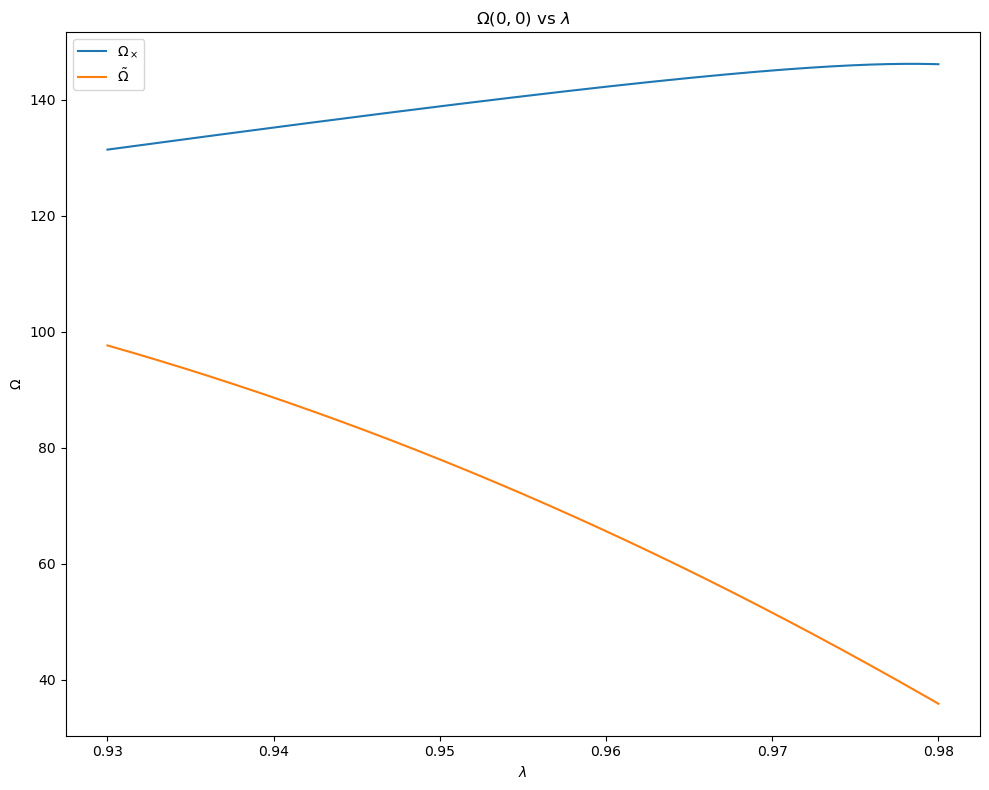

In [155]:
kappa = 1
V = [[-1, 0] [0, -1]]
vF = 100
q = [0.3, 0]
plot_scaling(kappa, V, vF, q)

# Symmetric Potential Scaling

In [42]:
function pure_3_patch_symm(lambda, kappa, vF, q)
    delta = -lambda_delta_symm(kappa, lambda)
    alpha = -lambda_alpha_symm(kappa, lambda)
    return bc_no_spinors(reshape(q, (1, 2)), 10^(-3), vF, delta, alpha, 1)[1]
end

pure_3_patch_symm (generic function with 1 method)

In [68]:
function cross_term_symm(lambda, kappa, vF, q)
    kappa1 = [kappa, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    delta = -lambda_delta_symm(kappa, lambda)
    alpha = -lambda_alpha_symm(kappa, lambda)

    phi = wrap_angle(angle(delta))

    # the commented out indices are messed up
    if 0 < phi && phi <= 2*pi/3
        index = 1
    # elseif 2*pi/3 < phi || phi <= -2*pi/3
    #     index = 0 + 1
    # elseif phi > -2*pi/3 && phi <= 0
    #     index = 2 + 1
    end
    index = 1

    dmu = 10^(-7)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = gauge_fix(normalize(eigvecs(Hermitian(ham))[:, 1]))

    A1 = vec[1]
    grad_A1 = d_A1(delta, alpha/2, q, index, vF/2, dmu)

    A1_x = 2im * real(conj(A1) * grad_A1[1])
    A1_y = 2im * real(conj(A1) * grad_A1[2])

    A3 = vec[2]
    grad_A3 = d_A3(delta, alpha/2, q, index, vF/2, dmu)
    A3_x = 2im * real(conj(A3) * grad_A3[1])
    A3_y = 2im * real(conj(A3) * grad_A3[2])

    A5 = vec[3]
    grad_A5 = d_A5(delta, alpha/2, q, index, vF/2, dmu)
    A5_x = 2im * real(conj(A5) * grad_A5[1])
    A5_y = 2im * real(conj(A5) * grad_A5[2])

    chi1 = lambda_spinor(lambda, kappa1 .+ q)
    grad_chi1 = d_lambda_spinor(lambda, kappa1 .+ q, dmu)
    chi1_x = dot(chi1, grad_chi1[1])
    chi1_y = dot(chi1, grad_chi1[2])

    chi3 = lambda_spinor(lambda, kappa3 .+ q)
    grad_chi3 = d_lambda_spinor(lambda, kappa3 .+ q, dmu)
    chi3_x = dot(chi3, grad_chi3[1])
    chi3_y = dot(chi3, grad_chi3[2])

    chi5 = lambda_spinor(lambda, kappa5 .+ q)
    grad_chi5 = d_lambda_spinor(lambda, kappa5 .+ q, dmu)
    chi5_x = dot(chi5, grad_chi5[1])
    chi5_y = dot(chi5, grad_chi5[2])

    return real((A1_x * chi1_y - A1_y * chi1_x) + (A3_x * chi3_y - A3_y * chi3_x) + (A5_x * chi5_y - A5_y * chi5_x))
end


cross_term_symm (generic function with 1 method)

In [69]:
function plot_symm_scaling(kappa, vF, q)
    lambda_list = range(0.999, 1.001, 10^3)

    curvatures = Array{Float64}(undef, 4, length(lambda_list))
    
    for j in 1:length(lambda_list)
        lambda = lambda_list[j]
        delta = -lambda_delta_symm(kappa, lambda)
        alpha = -lambda_alpha_symm(kappa, lambda)
        curvatures[1, j] = lambda_symm_parent(lambda, kappa, vF, q)
        curvatures[2, j] = cross_term_symm(lambda, kappa, vF, q)
        curvatures[3, j] = pure_3_patch_symm(lambda, kappa, vF, q)
        curvatures[4, j] = lambda_patch_bc(reshape(q, (1, 2)), 10^(-3), lambda, kappa, vF, delta, alpha, 1)[1]
    end
    fig, axs = plt.subplots(1,1,figsize=(10, 8))
    axs.set_xlabel(L"$\lambda$")
    axs.set_ylabel(L"$\Omega$")
    axs.set_title(L"$\Omega(0, 0) \text{ vs } \lambda$")
    #axs.plot(lambda_list, curvatures[4, :], label = L"$\Omega^\text{3p}$")
    #axs.plot(lambda_list, curvatures[3, :], label = L"$\tilde{\Omega}$")
   # axs.plot(lambda_list, curvatures[1, :], label = L"$\Omega_\text{par}$")
    axs.plot(lambda_list, curvatures[2, :], label = L"$\Omega^\times$")
    axs.legend()
    fig.tight_layout()
    
    fig
end

plot_symm_scaling (generic function with 1 method)

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


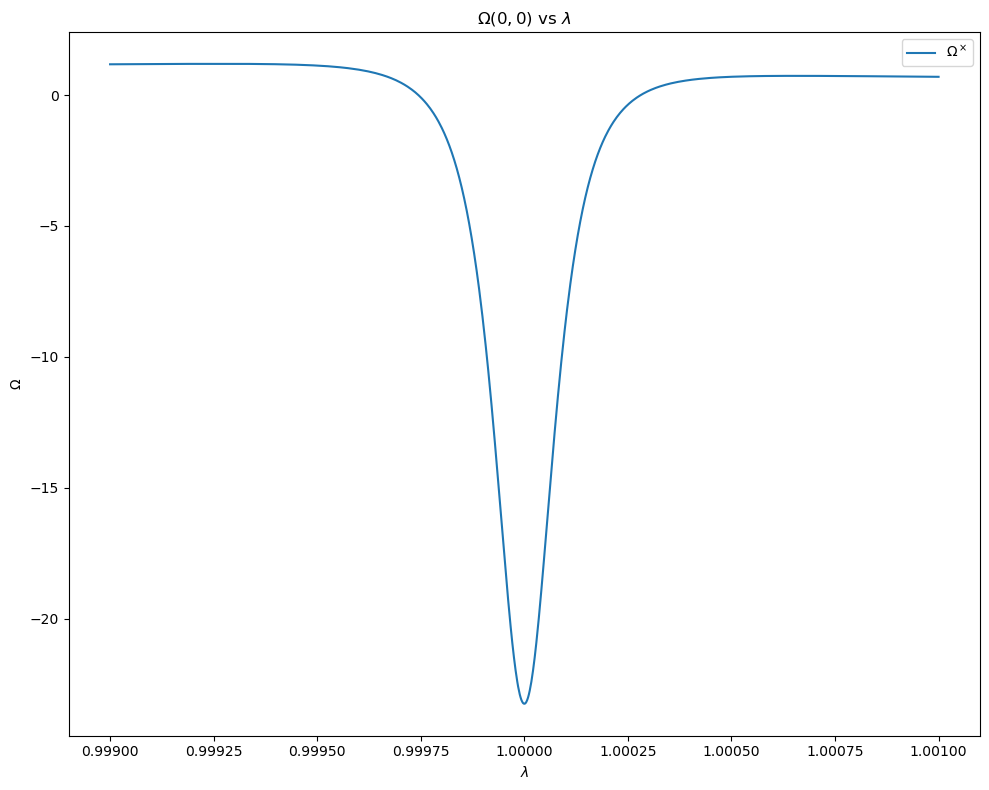

In [70]:
kappa = 1
vF = 3/2
q = [0.01, 0.01]
plot_symm_scaling(kappa, vF, q)

# Anti-Symmetric Potential Scaling

In [9]:
function pure_3_patch_asymm(lambda, kappa, vF, q)
    delta = lambda_delta_asymm(kappa, lambda)
    alpha = lambda_alpha_asymm(kappa, lambda)
    return bc_no_spinors(reshape(q, (1, 2)), 10^(-3), vF, delta, alpha)[1]
end

pure_3_patch_asymm (generic function with 1 method)

In [10]:
function cross_term_asymm(lambda, kappa, vF, q)
    kappa1 = [kappa, 0]
    kappa3 = kappa * [cos(2*pi/3), sin(2*pi/3)]
    kappa5 = kappa * [cos(4*pi/3), sin(4*pi/3)]

    delta = lambda_delta_asymm(kappa, lambda)
    alpha = lambda_alpha_asymm(kappa, lambda)

    phi = wrap_angle(angle(delta))

    # computations of indices are messed up here
    
    index = 1

    # if 0 < phi && phi <= 2*pi/3
    #     index = 1 + 1
    # elseif 2*pi/3 < phi || phi <= -2*pi/3
    #     index = 0 + 1
    # elseif phi > -2*pi/3 && phi <= 0
    #     index = 2 + 1
    # end

    dmu = 10^(-7)

    ham = H_mft_v2(q, delta, alpha) + H_k_v2(q, vF)

    vec = normalize(gauge_fix(eigvecs(Hermitian(ham))[:, 1]))

    A1 = vec[1]
    grad_A1 = d_A1(delta, alpha/2, q, index, vF/2, dmu)

    A1_x = 2im * real(conj(A1) * grad_A1[1])
    A1_y = 2im * real(conj(A1) * grad_A1[2])

    A3 = vec[2]
    grad_A3 = d_A3(delta, alpha/2, q, index, vF/2, dmu)
    A3_x = 2im * real(conj(A3) * grad_A3[1])
    A3_y = 2im * real(conj(A3) * grad_A3[2])

    A5 = vec[3]
    grad_A5 = d_A5(delta, alpha/2, q, index, vF/2, dmu)
    A5_x = 2im * real(conj(A5) * grad_A5[1])
    A5_y = 2im * real(conj(A5) * grad_A5[2])

    chi1 = lambda_spinor(lambda, kappa1 .+ q)
    grad_chi1 = d_lambda_spinor(lambda, kappa1 .+ q, dmu)
    chi1_x = dot(chi1, grad_chi1[1])
    chi1_y = dot(chi1, grad_chi1[2])

    chi3 = lambda_spinor(lambda, kappa3 .+ q)
    grad_chi3 = d_lambda_spinor(lambda, kappa3 .+ q, dmu)
    chi3_x = dot(chi3, grad_chi3[1])
    chi3_y = dot(chi3, grad_chi3[2])

    chi5 = lambda_spinor(lambda, kappa5 .+ q)
    grad_chi5 = d_lambda_spinor(lambda, kappa5 .+ q, dmu)
    chi5_x = dot(chi5, grad_chi5[1])
    chi5_y = dot(chi5, grad_chi5[2])

    return real((A1_x * chi1_y - A1_y * chi1_x) + (A3_x * chi3_y - A3_y * chi3_x) + (A5_x * chi5_y - A5_y * chi5_x))
end


cross_term_asymm (generic function with 1 method)

In [11]:
function plot_asymm_scaling(kappa, vF, q)
    lambda_list = range(0.3, 5, 10^3)

    curvatures = Array{Float64}(undef, 4, length(lambda_list))
    
    for j in 1:length(lambda_list)
        lambda = lambda_list[j]
        delta = lambda_delta_asymm(kappa, lambda)
        alpha = lambda_alpha_asymm(kappa, lambda)
        curvatures[1, j] = lambda_asymm_parent(lambda, kappa, vF, q)
        curvatures[2, j] = cross_term_asymm(lambda, kappa, vF, q)
        curvatures[3, j] = pure_3_patch_asymm(lambda, kappa, vF, q)
        curvatures[4, j] = lambda_patch_bc(reshape(q, (1, 2)), 10^(-3), lambda, kappa, vF, delta, alpha)[1]
    end
    figure()
    xlabel(L"\lambda")
    ylabel(L"\Omega")
    title(L"\Omega(0, 0) \text{ vs } \lambda")
    plot(lambda_list, curvatures[1, :] + curvatures[2, :] + curvatures[3, :], label = L"\Omega^\text{3p comps}")
    plot(lambda_list, curvatures[4, :], label = L"\Omega'^\text{3p num}")
    legend()
    display(gcf())
end

plot_asymm_scaling (generic function with 1 method)

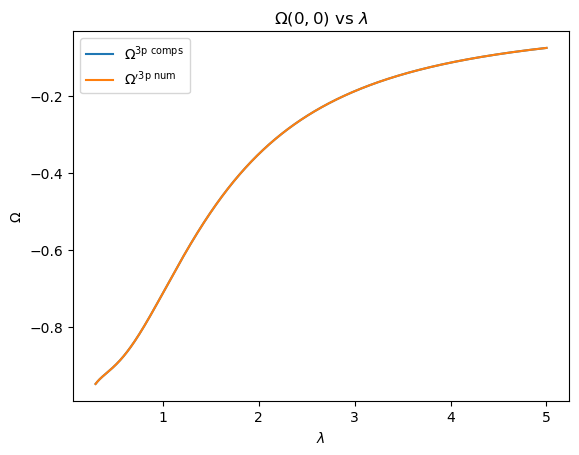

In [12]:
kappa = 1
vF = 10^(-2)
q = [0, 0]
plot_asymm_scaling(kappa, vF, q)

# Symmetric mBZ Scaling

In [82]:
function plot_symm_mBZ_scaling(kappa, vF, lambda)
    q_list = range(0.0, kappa/2, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(lambda_symm_parent(lambda, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_symm(lambda, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_symm(lambda, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } \frac{|q|}{\kappa} \ | v_F = 0.1, \ \lambda = 0.1, \ V = V_+", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"\frac{|q|}{\kappa}")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_symm_mBZ_scaling (generic function with 1 method)

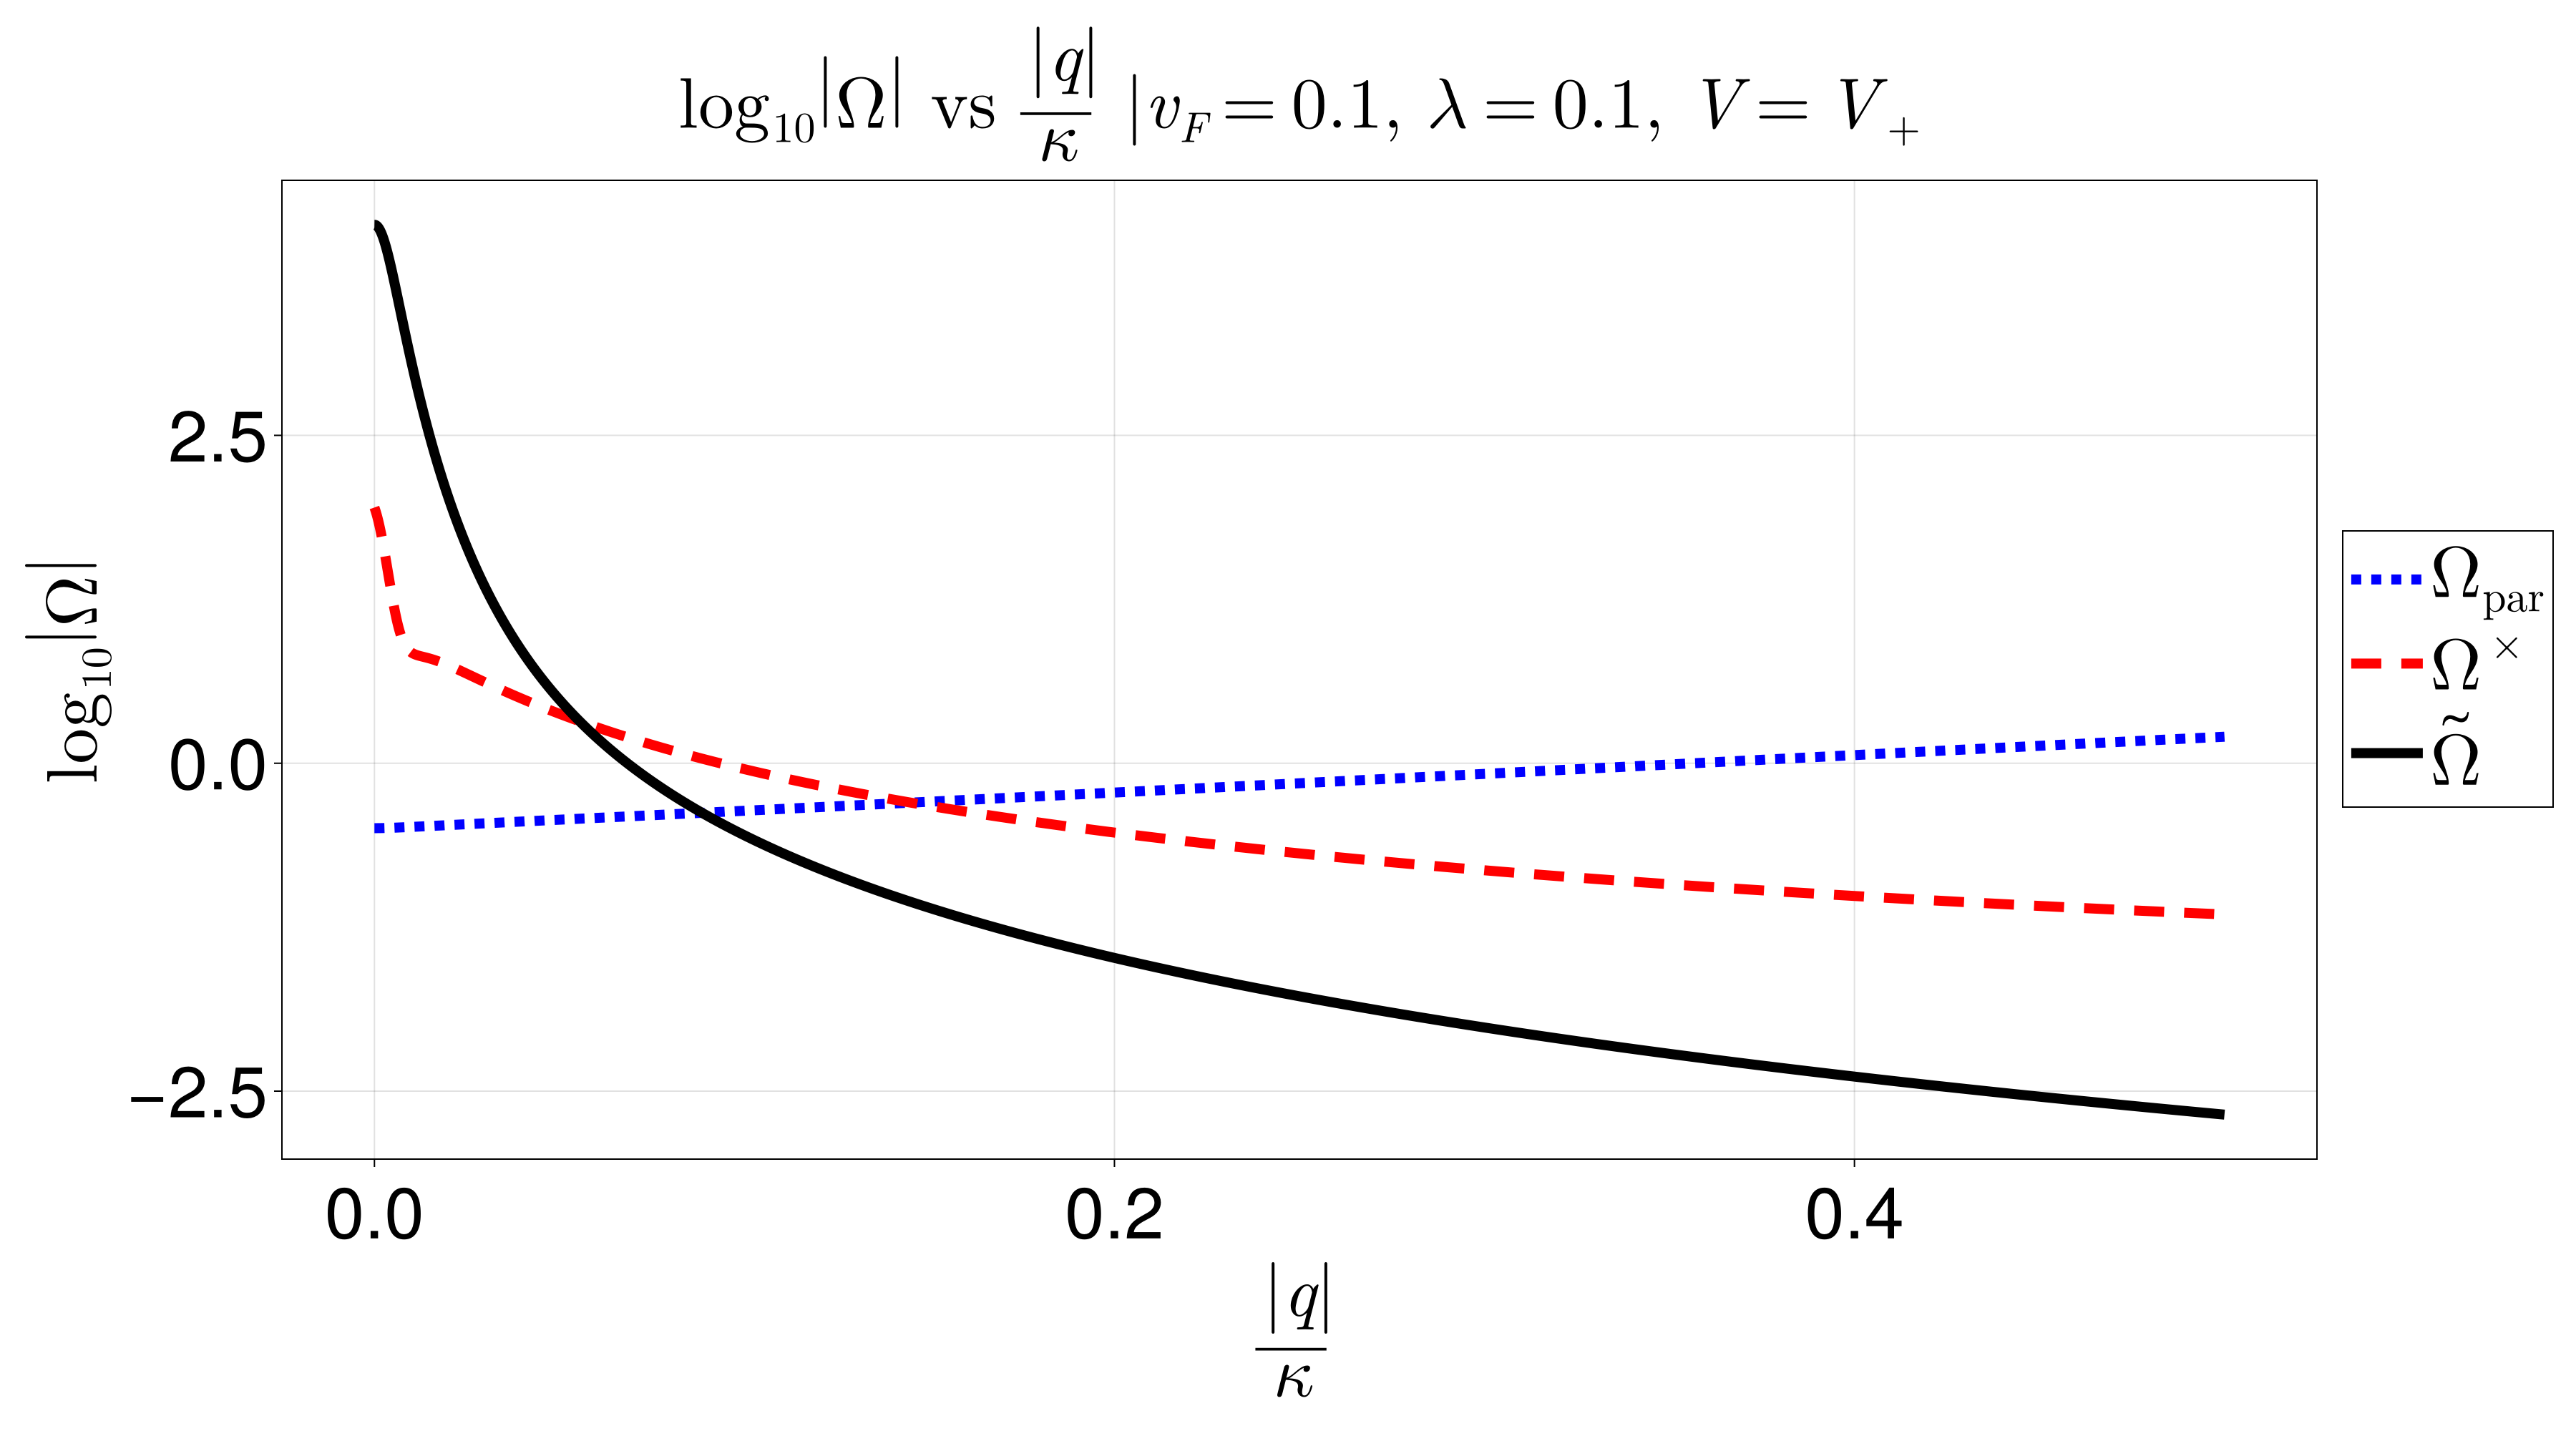

In [132]:
kappa = 1
vF = 100
lambda = 2
plot_symm_mBZ_scaling(kappa, vF, lambda)

In [135]:
function plot_symm_mBZ_scaling_prod(kappa, lambda)
    q_list = range(0.0, 5, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    vF = 1

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(lambda_symm_parent(lambda, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_symm(lambda, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_symm(lambda, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } v_F |q| \text{ for } \lambda = 0.1, \ V = V_+", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"v_F |q|")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_symm_mBZ_scaling_prod (generic function with 2 methods)

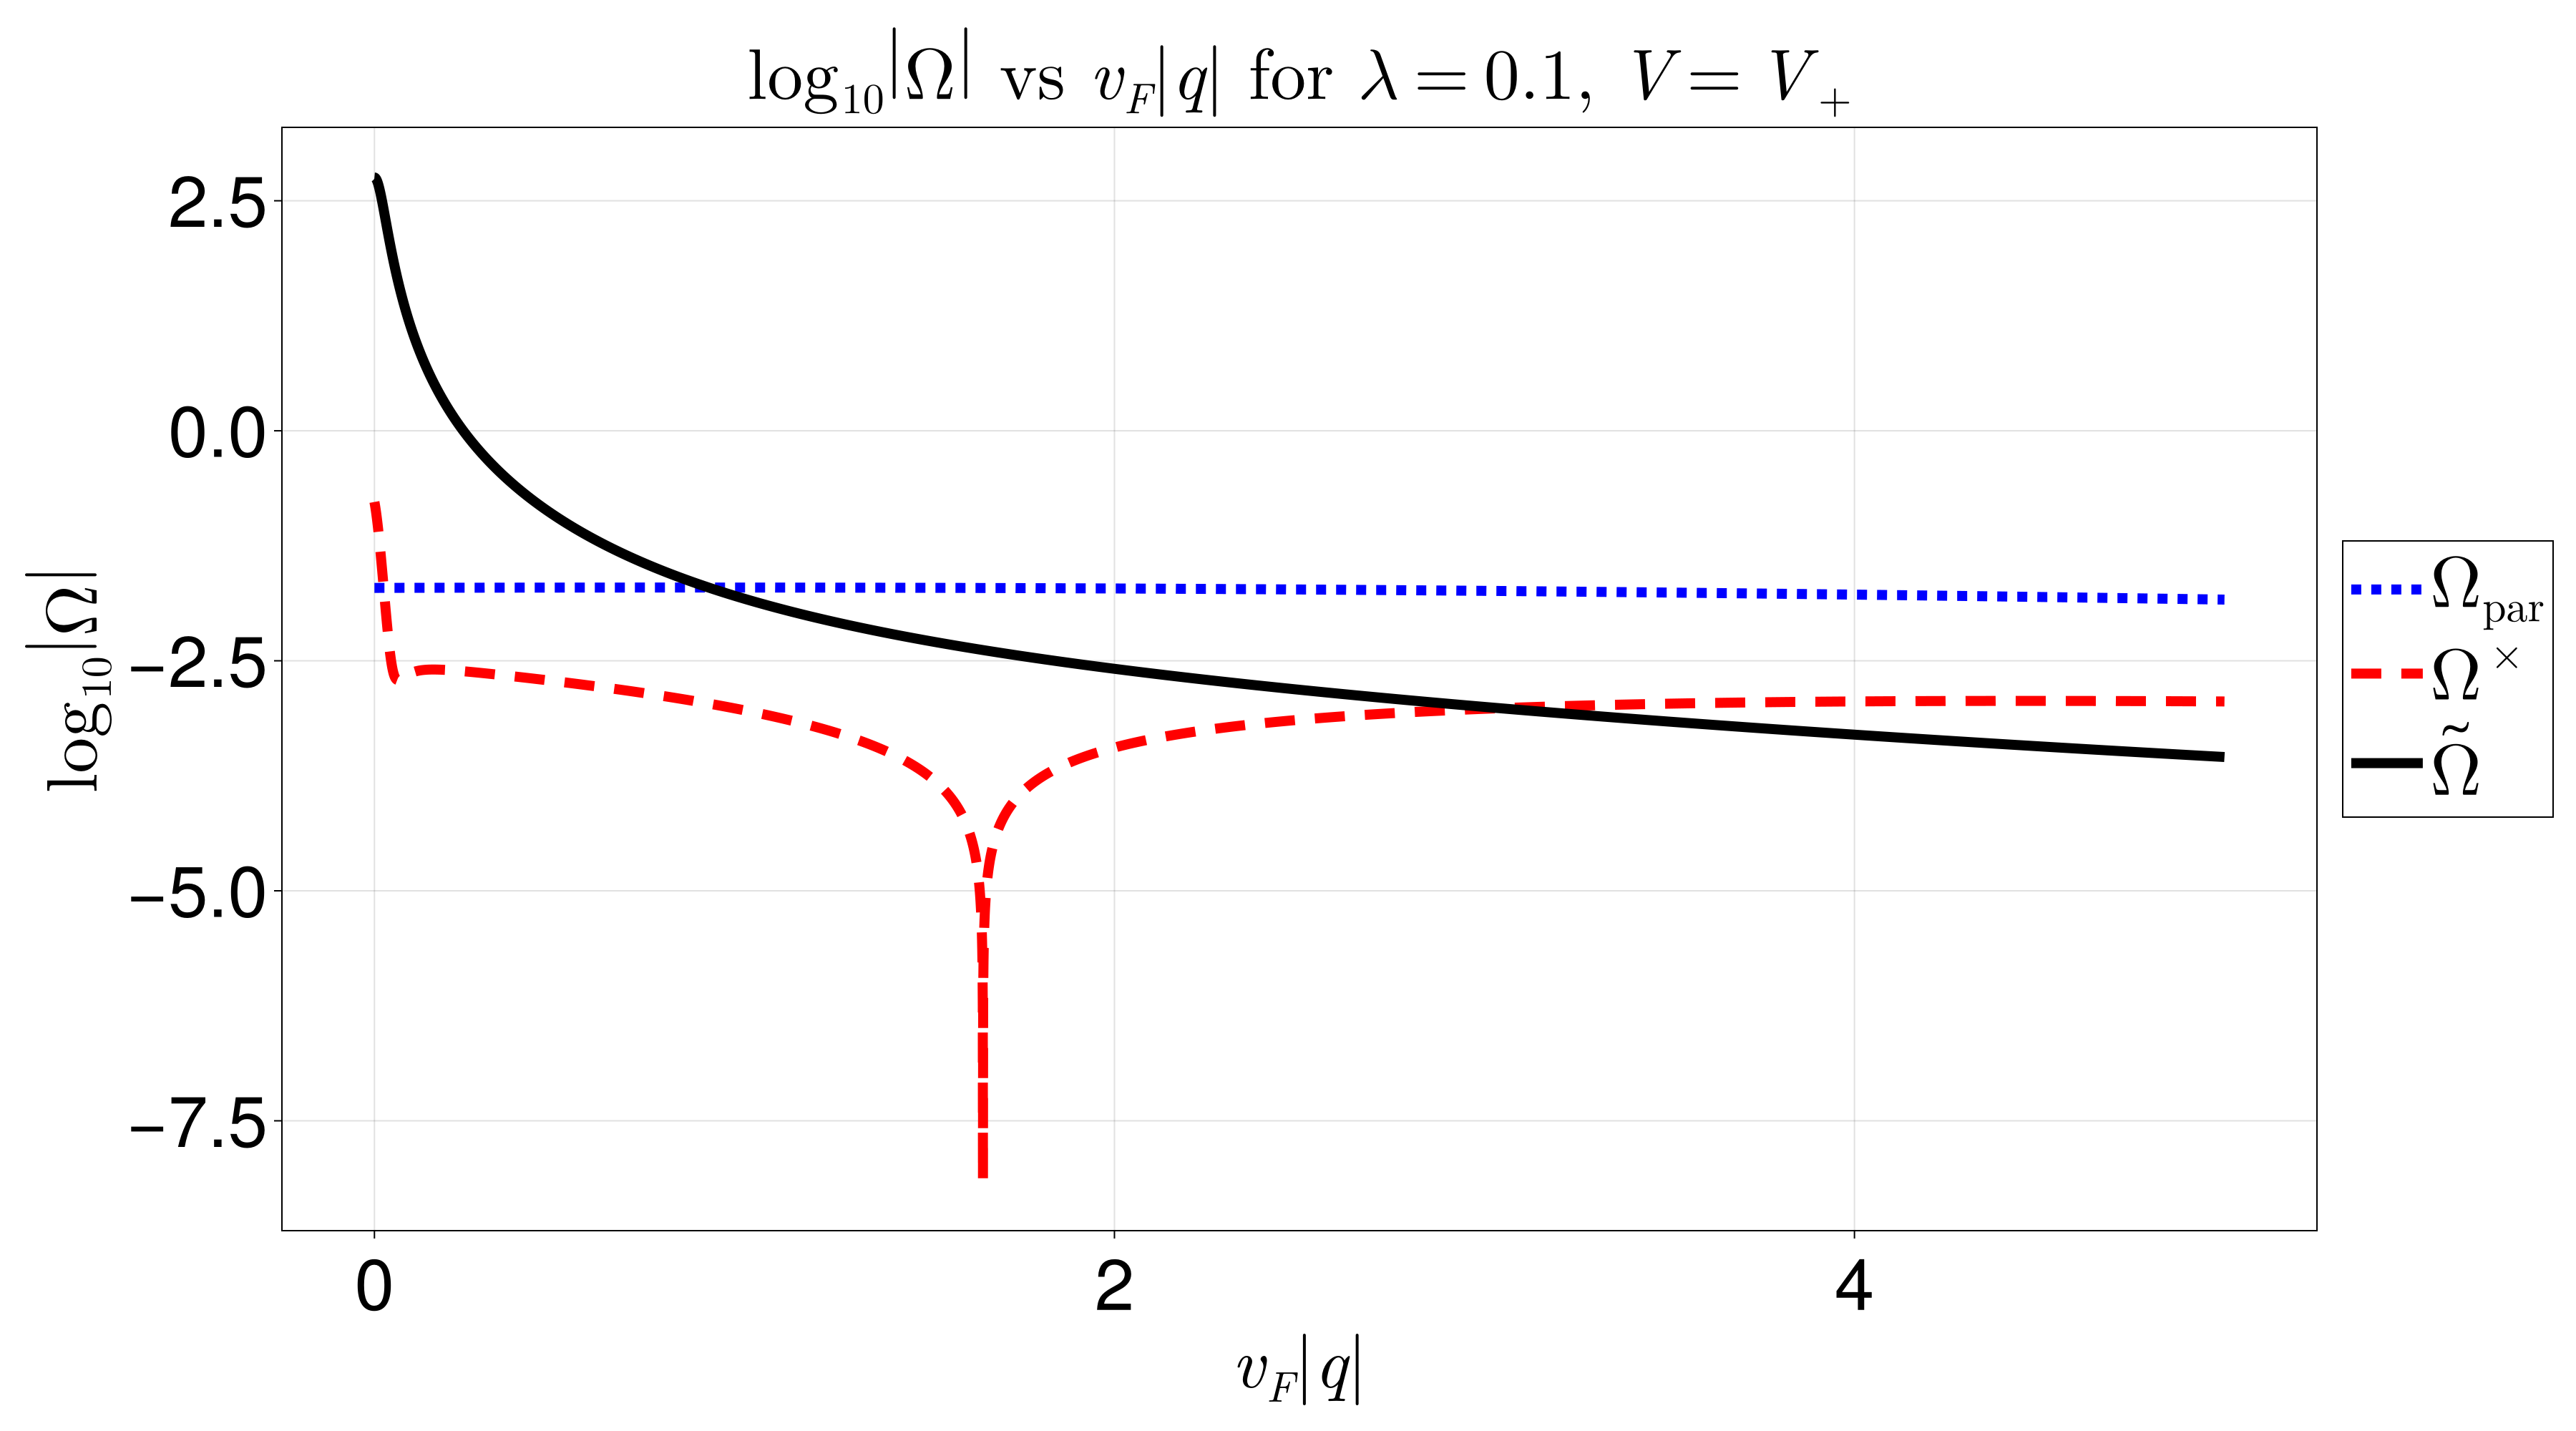

In [141]:
kappa = 1
lambda = 0.1
plot_symm_mBZ_scaling_prod(kappa, lambda)

# Anti-Symmetric mBZ Scaling

In [86]:
function plot_asymm_mBZ_scaling(kappa, vF, lambda)
    q_list = range(0.0, kappa/2, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(lambda_asymm_parent(lambda, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_asymm(lambda, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_asymm(lambda, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } \frac{|q|}{\kappa} \ | v_F = 0.1, \ \lambda = 0.1, \ V = V_-", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"\frac{|q|}{\kappa}")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_asymm_mBZ_scaling (generic function with 1 method)

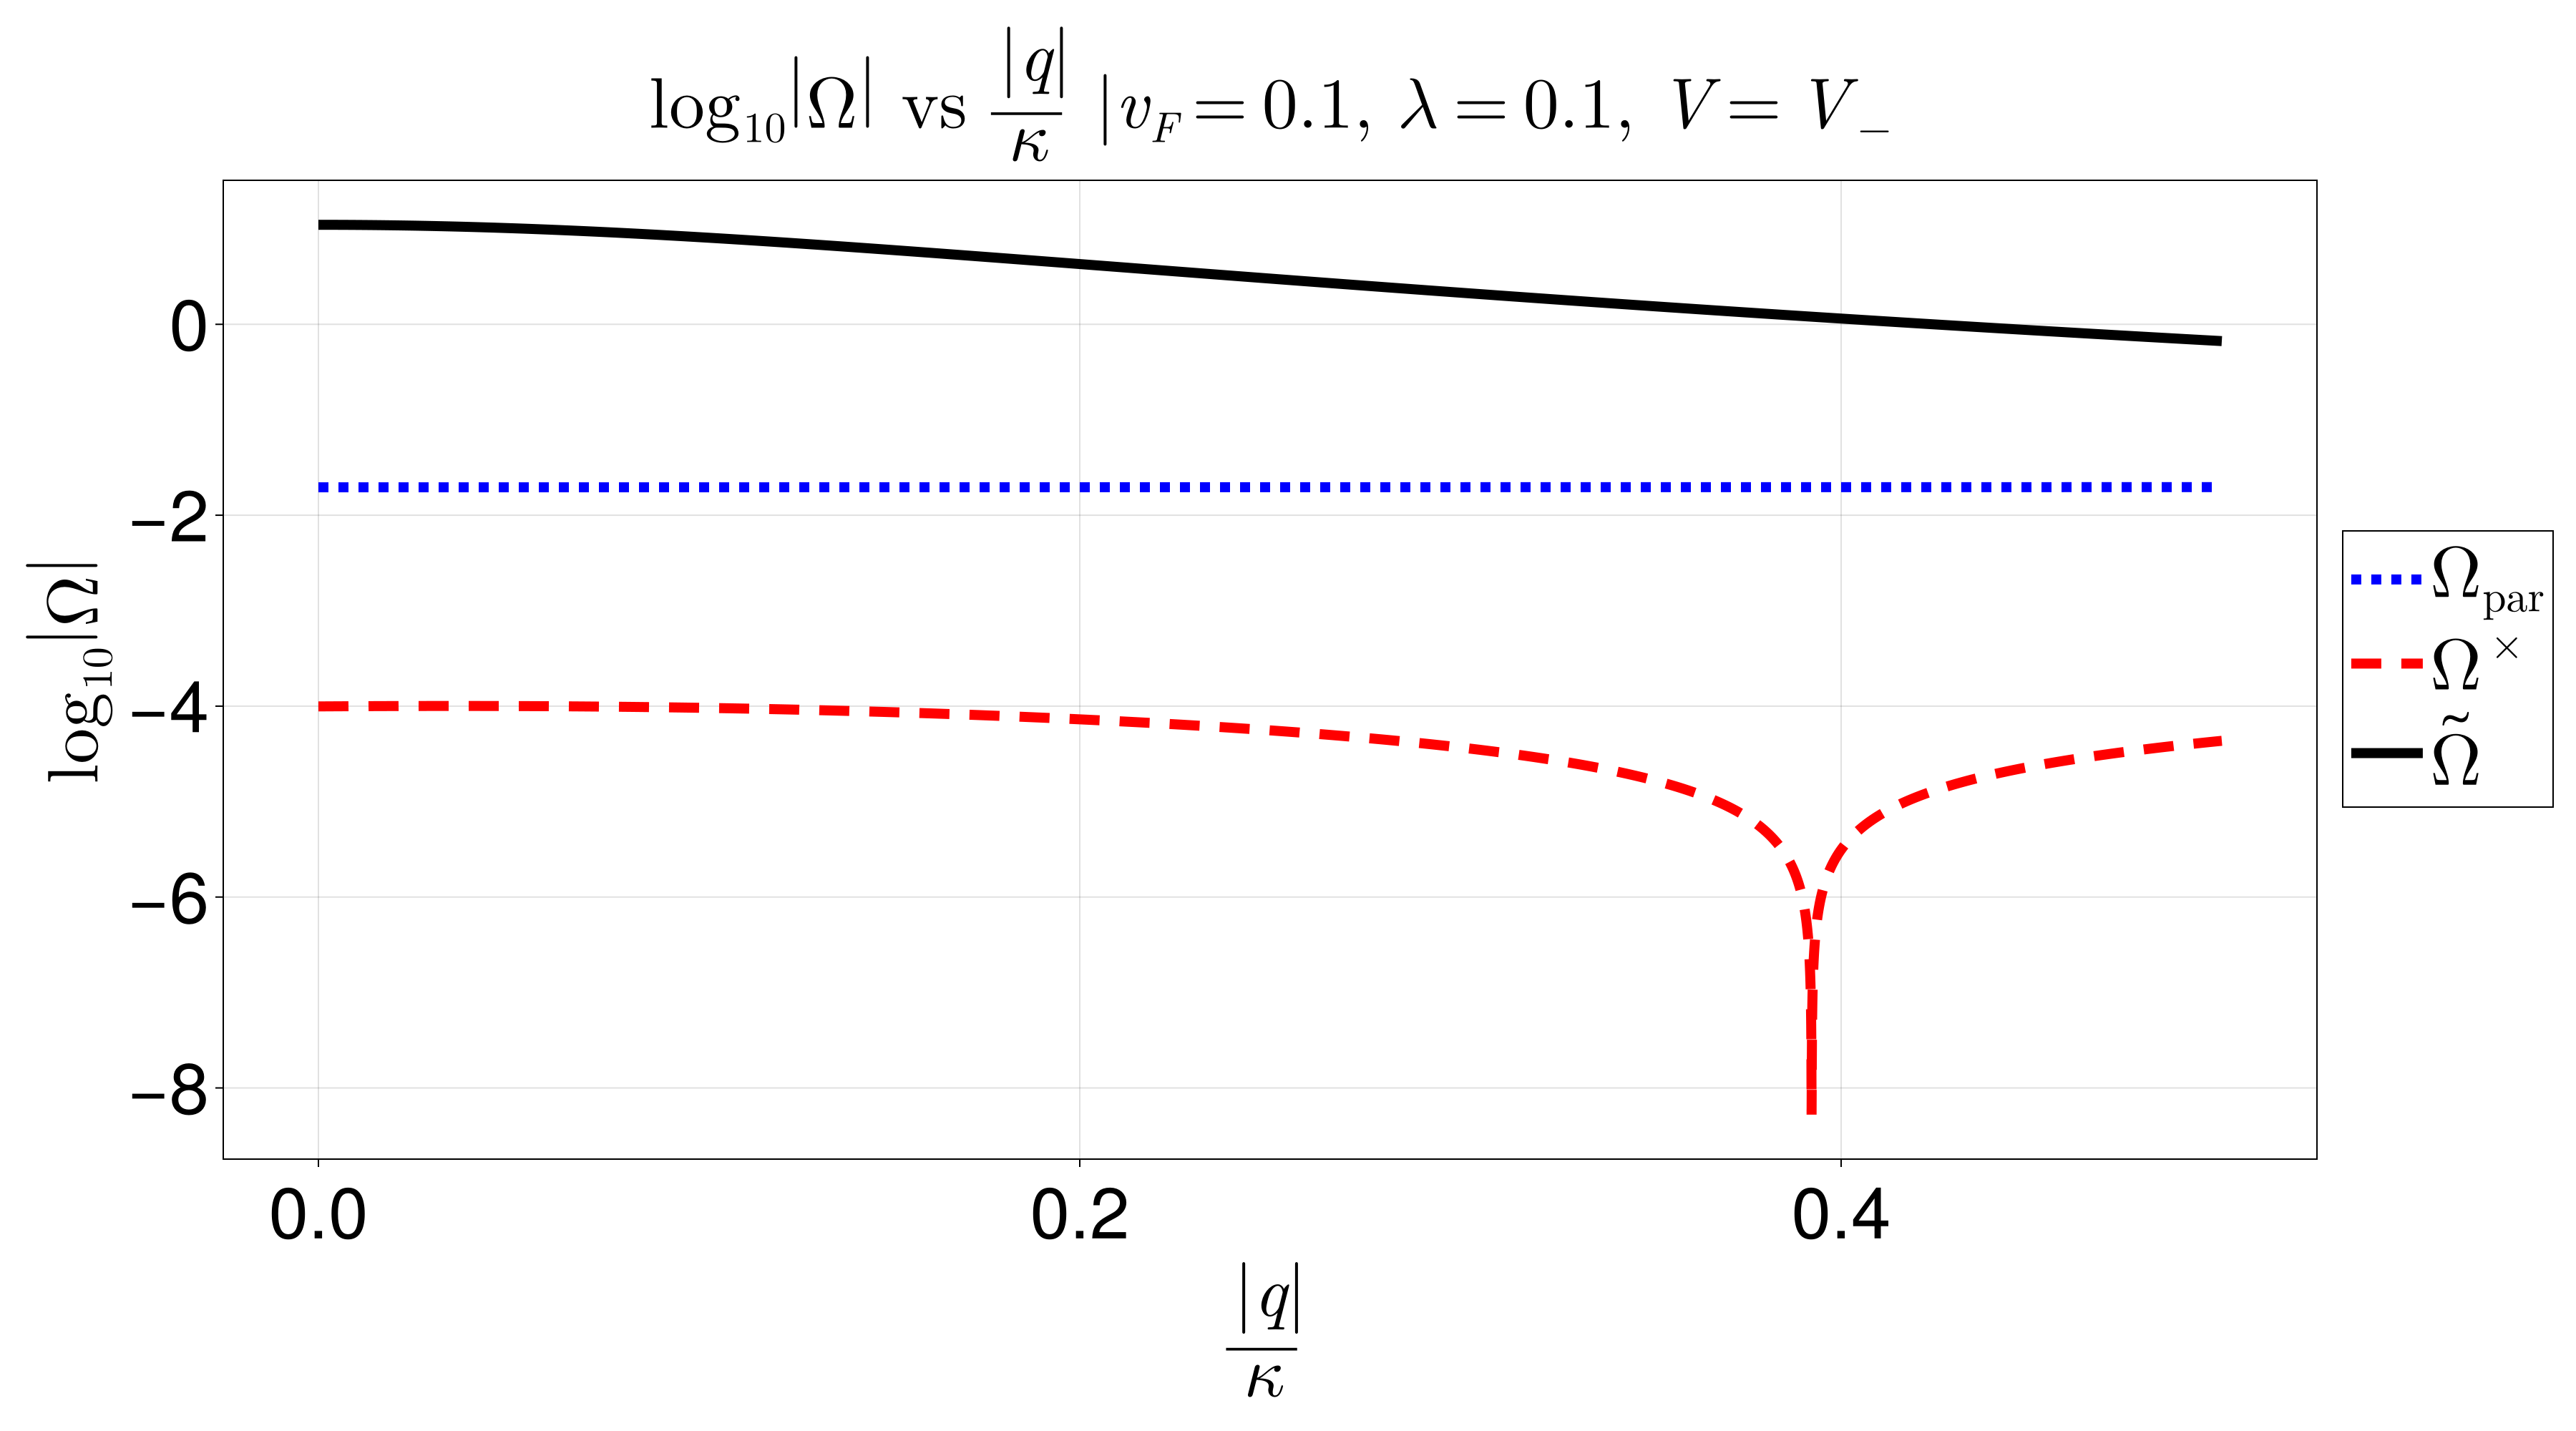

In [87]:
kappa = 1
vF = 0.1
lambda = 0.1
plot_asymm_mBZ_scaling(kappa, vF, lambda)

In [142]:
function plot_asymm_mBZ_scaling_prod(kappa, lambda)
    q_list = range(0.0, 5, 10^4)

    curvatures = Array{Float64}(undef, 4, length(q_list))

    vF = 1

    for j in 1:length(q_list)
        qmag = q_list[j]
        q = qmag * [cos(2*pi/9), sin(2*pi/9)]
        curvatures[1, j] = log10(abs(lambda_asymm_parent(lambda, kappa, vF, q)))
        curvatures[2, j] = log10(abs(cross_term_asymm(lambda, kappa, vF, q)))
        curvatures[3, j] = log10(abs(pure_3_patch_asymm(lambda, kappa, vF, q)))
    end

    fig = Figure(size=(1800, 1000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    ax1 = Axis(fig[1, 1], 
    title = L"\text{log_{10}} \left|\Omega \right| \text{ vs } v_F |q| \text{ for } \lambda = 0.1, \ V = V_-", 
    ylabel = L"\text{log_{10}} \left|\Omega \right|", xlabel = L"v_F |q|")

    lines!(ax1, q_list, curvatures[1, :], label = L"\Omega_\text{par}", color = :blue; linestyle = (:dot, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[2, :], label = L"\Omega^\times", color = :red; linestyle = (:dash, :dense), linewidth = 7)
    lines!(ax1, q_list, curvatures[3, :], label = L"\tilde{\Omega}", color = :black; linestyle = (:solid, :dense), linewidth = 7)
    fig[1, 2] = Legend(fig, ax1, patchsize = (50, 10), framevisible = true)
    fig
end

plot_asymm_mBZ_scaling_prod (generic function with 2 methods)

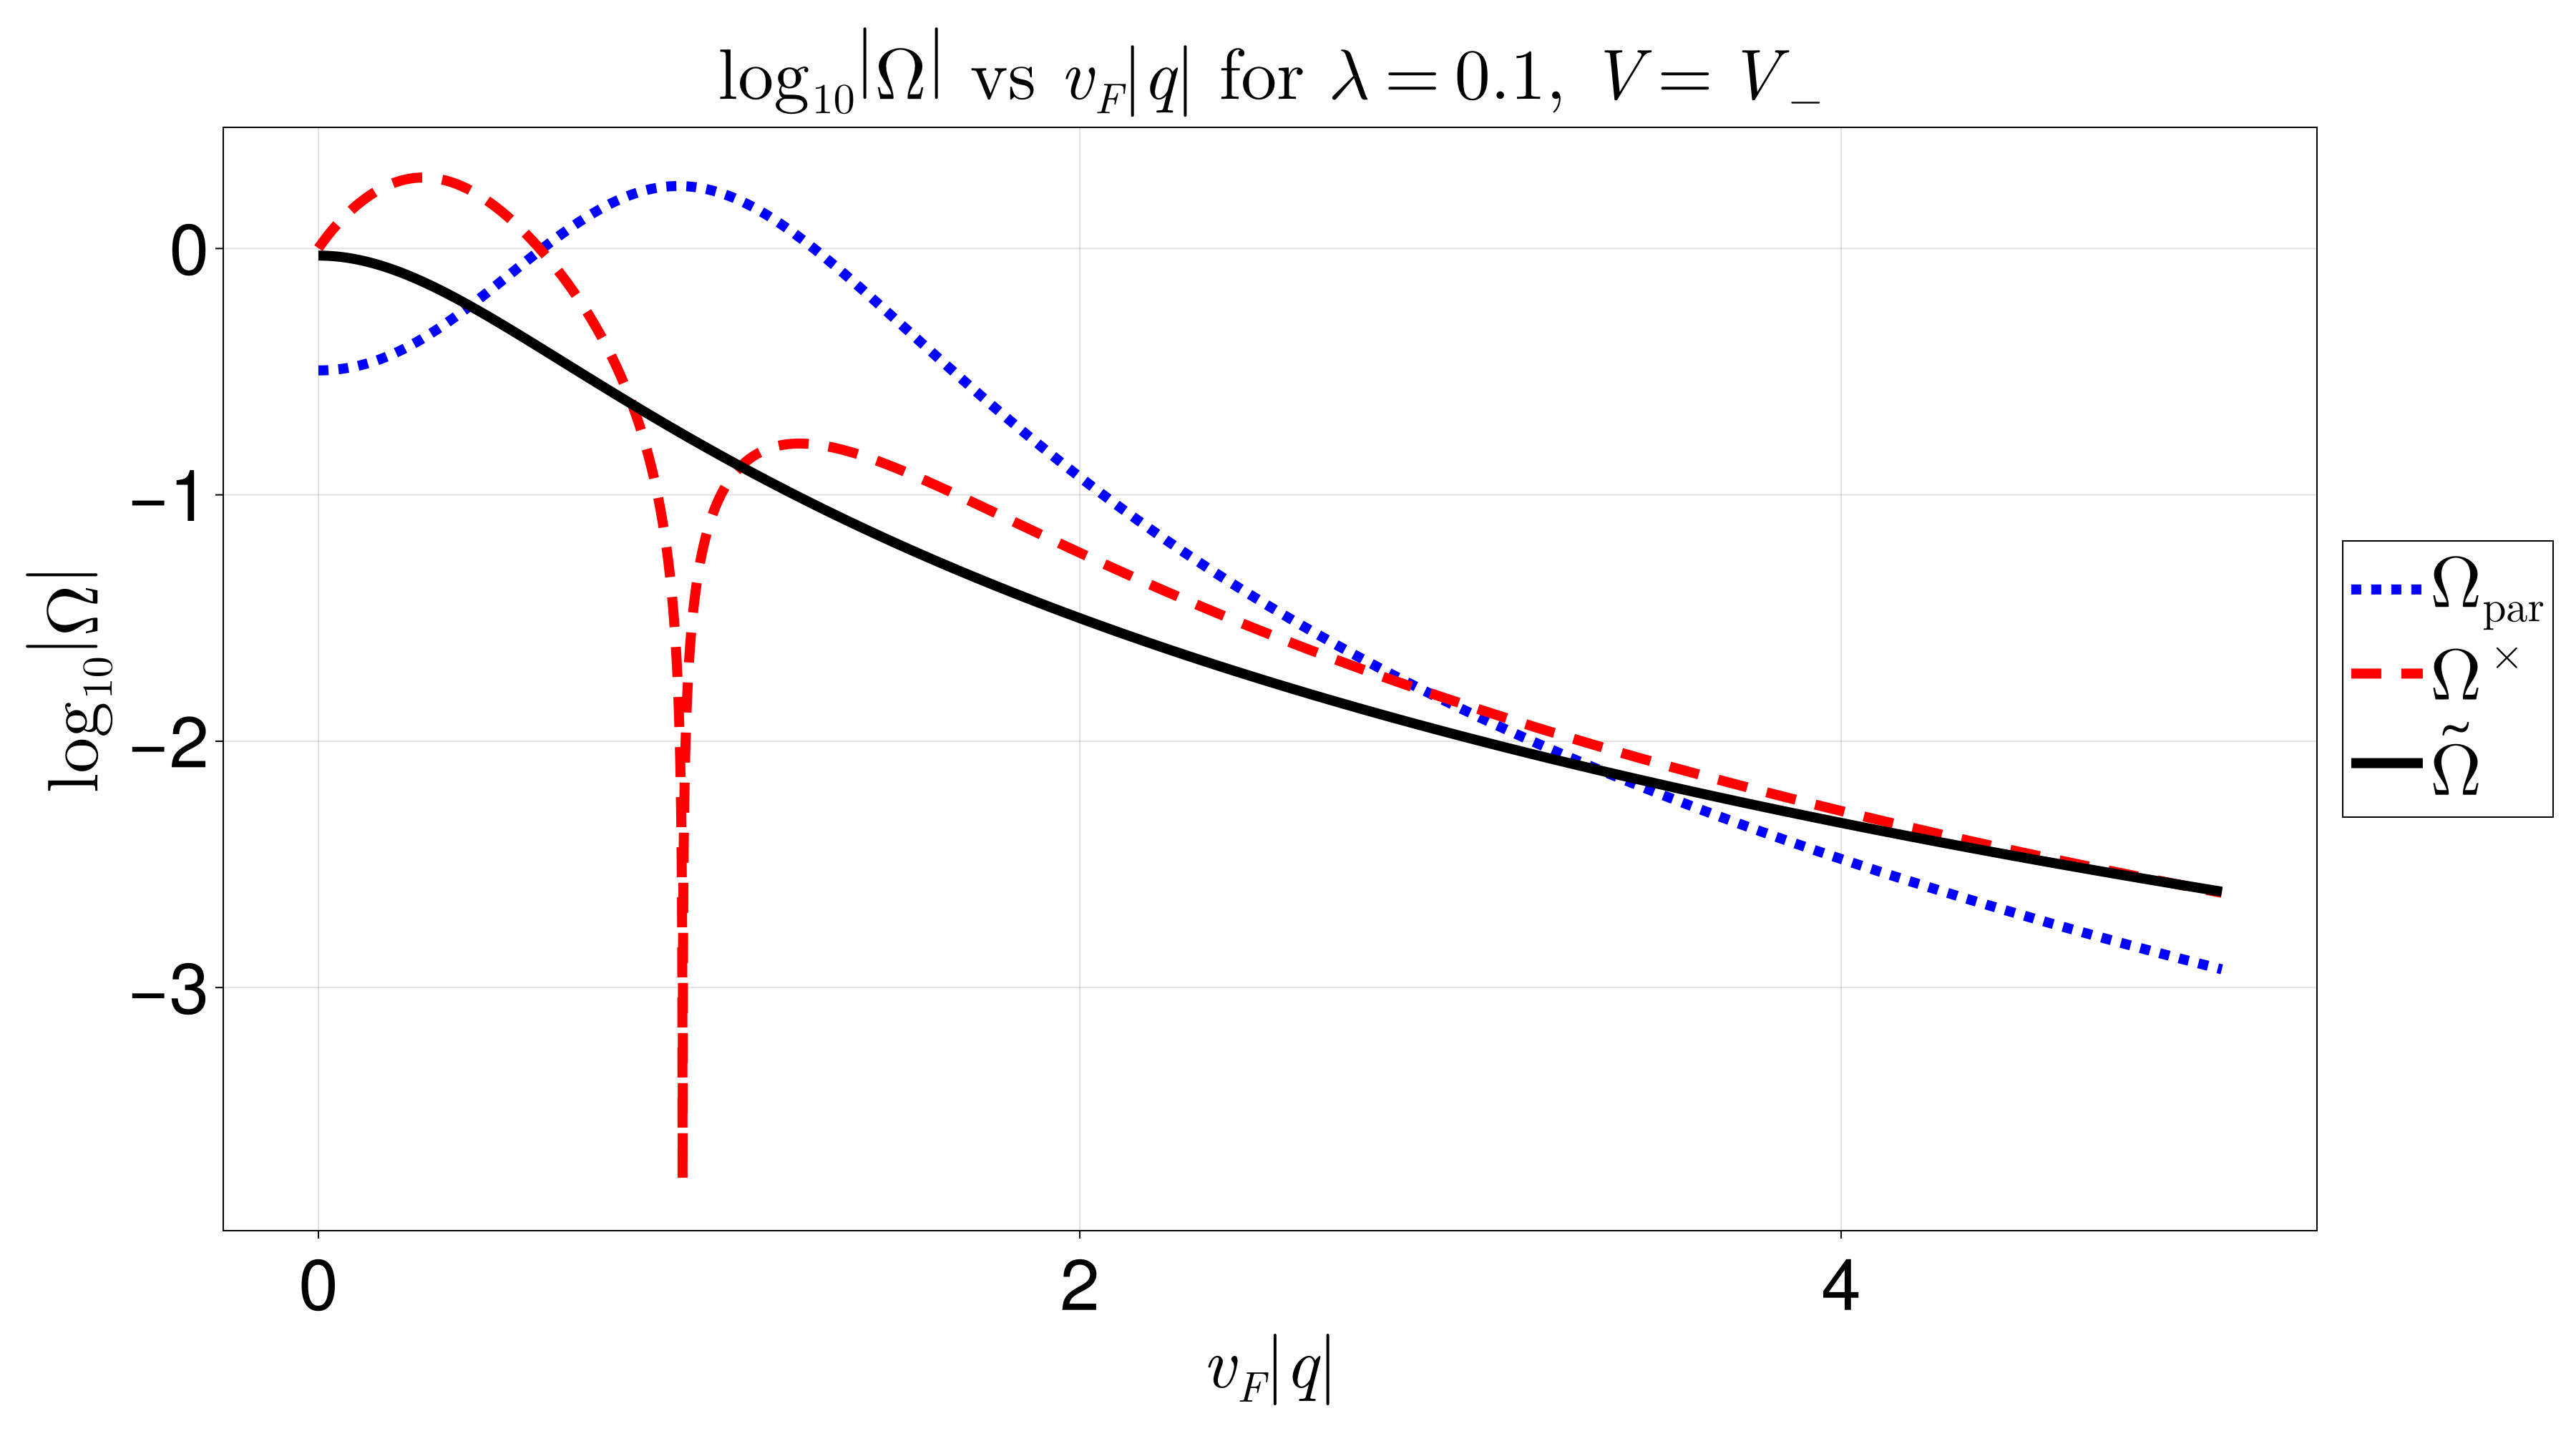

In [144]:
kappa = 1
lambda = 2
plot_asymm_mBZ_scaling_prod(kappa, lambda)